In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('Blood.h5ad')

/pollard/home/zhhu/miniconda3/envs/cellTypist/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata.shape

(335916, 47332)

In [5]:
adata

AnnData object with n_obs × n_vars = 335916 × 47332
    obs: 'Dataset', 'donor_id', 'development_stage', 'sex', 'suspension_type', 'assay', 'Original_annotation', 'CellHint_harmonised_group', 'cell_type', 'Curated_annotation', 'organism', 'disease', 'tissue'
    var: 'exist_in_Ren2021', 'exist_in_DominguezConde2022', 'exist_in_Stephenson2021', 'exist_in_Yoshida2021'
    uns: 'schema_version', 'title'
    obsm: 'X_umap'

In [17]:
adata.obs.Original_annotation

AAACCTGCAAAGGAAG-30                                     T_CD4_c01-LEF1
AAACCTGCACCCTATC-30                                      T_CD4_c05-FOS
AAACCTGCACGTCAGC-30                                      NK_c01-FCGR3A
AAACCTGCAGGATCGA-30                                     T_CD4_c02-AQP3
AAACCTGCATCGGACC-30                                     T_CD8_c01-LEF1
                                                             ...      
CV001_KM10202407-CV001_KM10202419_TTTACTGAGCTAAGAT-1      T CD4 helper
CV001_KM10202407-CV001_KM10202419_TTTCCTCTCCAATGGT-1     Monocyte CD16
CV001_KM10202407-CV001_KM10202419_TTTCCTCTCTGGGCCA-1               pDC
CV001_KM10202407-CV001_KM10202419_TTTGTCAAGATGAGAG-1       T CD4 naive
CV001_KM10202407-CV001_KM10202419_TTTGTCAAGTCCTCCT-1                NK
Name: Original_annotation, Length: 335916, dtype: category
Categories (140, object): ['ABCs', 'ASDC', 'B invar', 'B n-sw mem', ..., 'Trm_Th1/Th17', 'cDC2', 'gdT', 'pDC']

/pollard/home/zhhu/miniconda3/envs/cellTypist/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pollard/home/zhhu/miniconda3/envs/cellTypist/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


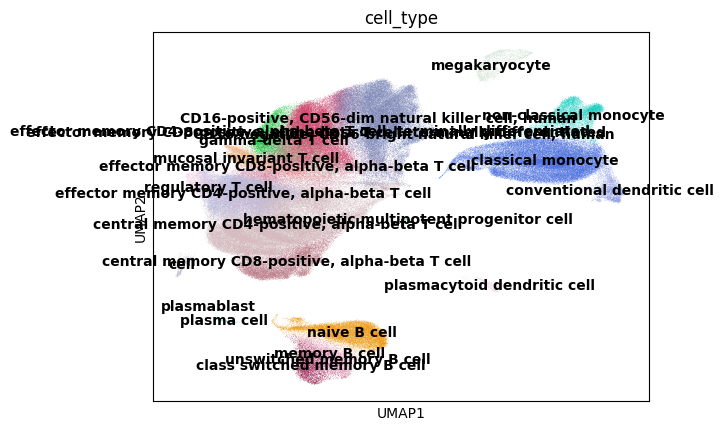

In [16]:
sc.pl.umap(adata, color = ['cell_type'], legend_loc = 'on data')

In [18]:
adata.obs.to_csv('blood_meta.csv')

In [20]:
import pandas as pd

In [26]:
adata2.raw.X

<67183x47332 sparse matrix of type '<class 'numpy.float32'>'
	with 101803475 stored elements in Compressed Sparse Row format>

In [24]:
adata2 = sc.pp.subsample(adata, fraction=0.2, n_obs=None, random_state=0, copy=True)

In [27]:
adata2.obs.Dataset.value_counts()

Dataset
Ren et al. 2021                33123
Stephenson et al. 2021         19269
Yoshida et al. 2021             9361
Dominguez Conde et al. 2022     5430
Name: count, dtype: int64

In [28]:
adata2.obs.to_csv('blood_meta_sub02.csv')

In [31]:
from scipy import sparse, io

In [32]:
io.mmwrite("blood_count_sub02.mtx", adata2.raw.X)

In [36]:
adata2.var.to_csv('blood_gene_sub02.csv')